In [10]:
# face detection for the 5 Celebrity Faces Dataset
from os import listdir
from os.path import isdir
from PIL import Image
from matplotlib import pyplot
from numpy import savez_compressed
from numpy import asarray

# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
	# load image from file
	image = Image.open(filename)
	# convert to RGB, if needed
	image = image.convert('RGB')
	# convert to array
	pixels = asarray(image)
	# create the detector, using default weights
	#detector = MTCNN()
	# detect faces in the image
	#results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	#x1, y1, width, height = results[0]['box']
	# bug fix
	#x1, y1 = abs(x1), abs(y1)
	#x2, y2 = x1 + width, y1 + height
	# extract the face
	#face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(pixels)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

# load images and extract faces for all images in a directory
def load_faces(directory):
	faces = list()
	# enumerate files
	for filename in listdir(directory):
		# path
		path = directory + filename
		# get face
		face = extract_face(path)
		# store
		faces.append(face)
	return faces

# load a dataset that contains one subdir for each class that in turn contains images
def load_dataset(directory):
	X, y = list(), list()
	# enumerate folders, on per class
	for subdir in listdir(directory):
		# path
		path = directory + subdir + '/'
		# skip any files that might be in the dir
		if not isdir(path):
			continue
		# load all faces in the subdirectory
		faces = load_faces(path)
		# create labels
		labels = [subdir for _ in range(len(faces))]
		# summarize progress
		print('>loaded %d examples for class: %s' % (len(faces), subdir))
		# store
		X.extend(faces)
		y.extend(labels)
	return asarray(X), asarray(y)

# load train dataset
trainX, trainy = load_dataset('Images/train/')
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset('Images/test/')
# save arrays to one file in compressed format
savez_compressed('5-celebrity-faces-dataset.npz', trainX, trainy, testX, testy)

>loaded 30 examples for class: bird_train
>loaded 30 examples for class: butterfly_train
>loaded 30 examples for class: dog_train
>loaded 30 examples for class: Fish_train
>loaded 30 examples for class: mountains_train
(150, 224, 224, 3) (150,)
>loaded 20 examples for class: bird_test
>loaded 20 examples for class: butterfly_test
>loaded 20 examples for class: dog_test
>loaded 20 examples for class: Fish_test
>loaded 20 examples for class: mountains_test


In [3]:
from numpy import load
data = load('dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

Loaded:  (150, 224, 224, 3) (150,) (100, 224, 224, 3) (100,)


bird_train


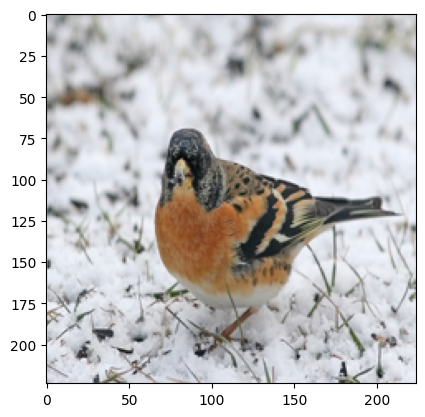

In [4]:
import matplotlib.pyplot as plt
print(trainy[16])
plt.imshow(trainX[16])

In [2]:
from keras.models import load_model
model = load_model("retrained_model.h5")

ModuleNotFoundError: No module named 'tensorflow.python'

In [7]:
import numpy as np  
a  = np.array([[0,1,0,0],
[1,0,0,0],
    [0,0,0,1]])
print(np.argmax(a, axis=1))


[1 0 3]


In [ ]:
import numpy as np
array = np.array([[0, 1, 0, 0], [0, 0, 0, 1]])
